In [17]:
import pandas as pd
from pathlib import Path
import numpy as np
 


data_dir = r'C:\SportsProject\premier_team_analysis\data'

player_stats_df = pd.read_csv(f'{data_dir}/player_stats.csv')
player_salaries_df = pd.read_csv(f'{data_dir}/player_salaries.csv')
team_stats_df = pd.read_csv(f'{data_dir}/team_stats.csv')
standings_df = pd.read_csv(f'{data_dir}/standings.csv')
fixtures_df = pd.read_csv(f'{data_dir}/fixtures.csv')
team_salary_df = pd.read_csv(f'{data_dir}/team_salary.csv')
player_possession_stats_df = pd.read_csv(f'{data_dir}/player_possession_stats.csv')
team_possession_stats_df = pd.read_csv(f'{data_dir}/team_possession_stats.csv')


#Code from https://www.kaggle.com/code/astonvaz/stats-don-t-lie-premier-league-24-25-deep-dive

df_dict = {
    'team_possession_stats': team_possession_stats_df,
    'player_possession_stats': player_possession_stats_df,
    'team_salary': team_salary_df,
    'standings': standings_df,
    'team_stats': team_stats_df,
    'player_salaries': player_salaries_df,
    'fixtures': fixtures_df,
    'player_stats': player_stats_df
}

def print_df_shape(name, dataframe):
    """Displays dataframe name and shape"""
    print(f"{name} Dataset shape: {dataframe.shape}\n")
    
def display_column_names(name, dataframe):
    """Displays column names in a dataframe"""
    print(f"{name} columns:\n{dataframe.columns.tolist()} \n")
    
def display_first_five_rows(table_name, dataframe):
    print(f"{table_name} data:")
    print(f"{dataframe.head(5)}\n\n")
    
def display_data_types(name, dataframe):
    print(f"{name} data types:")
    print(f"{dataframe.info()}\n")
    

In [10]:
player_stats = df_dict['player_stats']
player_possession = df_dict['player_possession_stats']
player_salaries = df_dict['player_salaries']


# Merge on player name (normalize columns)
player_stats = player_stats.rename(columns={'name': 'player'})
player_salaries = player_salaries.rename(columns={'Player': 'player'})

# Merge all data
player_df = player_stats.merge(player_possession, on=['player', 'team', 'age'], suffixes=('', '_pos'), how='inner')
player_df = player_df.merge(player_salaries[['player', 'Annual']], on='player', how='left')

display(player_df)
print(f"{"ffds"} columns:\n{player_df.columns.tolist()} \n")

,player,nation,position,team,age,born,played,starts,minutes,goals,...,deffensive_touches,middle_touches,attacking_touches,attempted_take_ons,successful_take_ons,takeons_tackled,carries,total_distance_carried,received,Annual
0,Max Aarons,England,DF,Bournemouth,25.0,2000.0,3,1,86,0,...,19,40,15,2,0,1,41,152,40,2222679.0
1,Joshua Acheampong,England,DF,Chelsea,19.0,2006.0,4,2,170,0,...,48,81,8,2,1,0,106,709,111,NaN
2,Tyler Adams,United States,MF,Bournemouth,26.0,1999.0,27,20,1875,0,...,338,741,214,17,3,10,622,3119,718,3810307.0
3,Tosin Adarabioyo,England,DF,Chelsea,27.0,1997.0,21,14,1319,1,...,596,633,27,5,4,0,733,2991,948,7620614.0
4,Simon Adingra,Cote dIvoire,"FW,MF",Brighton,23.0,2002.0,28,11,1052,2,...,66,168,302,49,21,27,356,2460,372,793814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Leny Yoro,France,DF,Manchester Utd,19.0,2005.0,21,12,1165,0,...,413,414,70,4,2,2,614,3173,656,7303088.0
486,Ashley Young,England,DF,Everton,39.0,1985.0,31,18,1785,1,...,354,507,300,18,5,9,473,2375,602,2540205.0
487,Illia Zabarnyi,Ukraine,DF,Bournemouth,22.0,2002.0,35,34,3019,0,...,908,1026,73,8,5,2,1221,7951,1246,NaN
488,Oleksandr Zinchenko,Ukraine,"DF,MF",Arsenal,28.0,1996.0,14,4,458,0,...,77,207,130,4,3,0,235,1151,287,9525767.0


ffds columns:
['player', 'nation', 'position', 'team', 'age', 'born', 'played', 'starts', 'minutes', 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts', 'yellow', 'red', 'expected_goals', 'progressive_carries', 'progressive_passes', 'received_progressive_passes', 'nation_pos', 'position_pos', '90s', 'touches', 'deffensive_touches', 'middle_touches', 'attacking_touches', 'attempted_take_ons', 'successful_take_ons', 'takeons_tackled', 'carries', 'total_distance_carried', 'received', 'Annual'] 



In [18]:
# Convert salary to numeric if needed
player_df['Annual'] = pd.to_numeric(player_df['Annual'], errors='coerce')
player_df['minutes'] = pd.to_numeric(player_df['minutes'], errors='coerce')

# Filter out players with missing salary or 0 minutes
player_df = player_df.dropna(subset=['Annual', 'minutes'])
player_df = player_df[player_df['minutes'] > 0]
player_df = player_df[player_df['Annual'] > 0]

# Salary in millions
player_df['annual_million'] = player_df['Annual'] / 1e6

# Calculate 90s played
player_df['90s'] = player_df['minutes'] / 90

#stats for 90 minutes

player_df['goals_per90'] = player_df['goals'] / player_df['90s']
player_df['assists_per90'] = player_df['assists'] / player_df['90s']
player_df['xg_per90'] = player_df['expected_goals'] / player_df['90s']
player_df['prog_carries_per90'] = player_df['progressive_carries'] / player_df['90s']
player_df['prog_passes_per90'] = player_df['progressive_passes'] / player_df['90s']

#stats for million

player_df['goals_per_million'] = player_df['goals'] / player_df['annual_million']
player_df['assists_per_million'] = player_df['assists'] / player_df['annual_million']
player_df['xg_per_million'] = player_df['expected_goals'] / player_df['annual_million']
player_df['prog_carries_per_million'] = player_df['progressive_carries'] / player_df['annual_million']
player_df['prog_passes_per_million'] = player_df['progressive_passes'] / player_df['annual_million']




Data preparation finished. Now first lineal model with few predictors

In [19]:
features = [
    'goals_per90',
    'assists_per90',
    'xg_per90',
    'prog_carries_per90',
    'prog_passes_per90'
]

X = player_df[features]
y = player_df['annual_million']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)

# Predictions and residuals
player_df['predicted_salary'] = model.predict(X)
player_df['salary_residual'] = player_df['annual_million'] - player_df['predicted_salary']

# Top 10 underpaid
underpaid = player_df.sort_values('salary_residual').head(10)

# Top 10 overpaid
overpaid = player_df.sort_values('salary_residual', ascending=False).head(10)

print("Top 10 Underpaid Players:")
print(underpaid[['player', 'team', 'annual_million', 'predicted_salary', 'salary_residual']])

print("\nTop 10 Overpaid Players:")
print(overpaid[['player', 'team', 'annual_million', 'predicted_salary', 'salary_residual']])



Top 10 Underpaid Players:
               player          team  annual_million  predicted_salary  \
312     Rodrigo Muniz        Fulham        0.476288          8.757239   
479       Yoane Wissa     Brentford        1.587628          8.733545   
226      Curtis Jones     Liverpool        0.952577          7.972199   
70        Tom Cairney        Fulham        1.905153          7.642728   
425  Marcus Tavernier   Bournemouth        2.222679          7.820712   
11     Carlos Alcaraz       Everton        1.396151          6.833137   
106  Mikkel Damsgaard     Brentford        1.905153          7.213498   
476      Harry Wilson        Fulham        2.222679          7.516021   
389      Kevin Schade     Brentford        0.635051          5.549284   
427       Jack Taylor  Ipswich Town        0.635051          5.512709   

     salary_residual  
312        -8.280951  
479        -7.145917  
226        -7.019622  
70         -5.737575  
425        -5.598033  
11         -5.436986  
106      

We see outliers that are affecting sush as playesrs who don't play much

🔻 Top 10 Underpaid Players:

                    player           team  annual_million  predicted_salary  \
312          Rodrigo Muniz         Fulham        0.476288          6.247247   
226           Curtis Jones      Liverpool        0.952577          6.488454   
479            Yoane Wissa      Brentford        1.587628          6.640980   
425       Marcus Tavernier    Bournemouth        2.222679          6.410428   
11          Carlos Alcaraz        Everton        1.396151          5.444274   
106       Mikkel Damsgaard      Brentford        1.905153          5.785672   
186             Lewis Hall  Newcastle Utd        0.444536          4.060232   
427            Jack Taylor   Ipswich Town        0.635051          4.176364   
190  Taylor Harwood-Bellis    Southampton        0.476288          3.964636   
61        Nathan Broadhead   Ipswich Town        0.381031          3.850789   

     salary_residual  
312        -5.770959  
226        -5.535877  
479        -5.053352  
425      

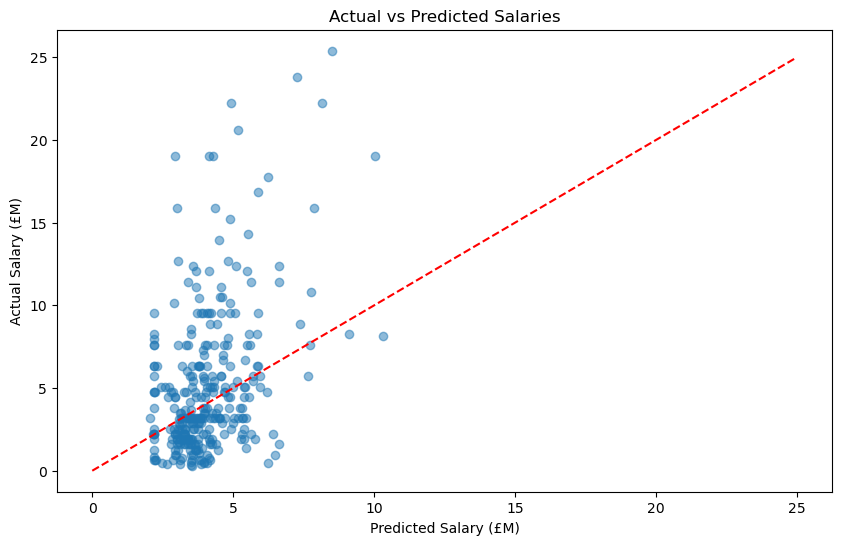

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Filter players with at least 500 minutes
player_df = player_df[player_df['minutes'] >= 500].copy()

# Prepare features and target
features = [
    'goals_per90',
    'assists_per90', 
    'xg_per90',
    'prog_carries_per90',
    'prog_passes_per90'
]

# Convert salary to millions and apply log transform
player_df['annual_million'] = player_df['Annual'] / 1e6
y = np.log1p(player_df['annual_million'])  # log(1 + salary)

# Scale features
scaler = StandardScaler()
X = player_df[features]
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Make predictions (using scaled features)
player_df['log_pred_salary'] = model.predict(X_scaled)
player_df['predicted_salary'] = np.expm1(player_df['log_pred_salary'])

# Calculate residuals (actual - predicted)
player_df['salary_residual'] = player_df['annual_million'] - player_df['predicted_salary']

# Show top 10 underpaid (positive residuals = underpaid)
underpaid = player_df.sort_values('salary_residual').head(10)[[
    'player', 'team', 'annual_million', 'predicted_salary', 'salary_residual'
]]
print("🔻 Top 10 Underpaid Players:\n")
print(underpaid)

# Show top 10 overpaid (negative residuals = overpaid)
overpaid = player_df.sort_values('salary_residual', ascending=False).head(10)[[
    'player', 'team', 'annual_million', 'predicted_salary', 'salary_residual'
]]
print("\n🔺 Top 10 Overpaid Players:\n")
print(overpaid)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(player_df['predicted_salary'], player_df['annual_million'], alpha=0.5)
plt.plot([0,25], [0,25], 'r--')  # Reference line
plt.xlabel('Predicted Salary (£M)')
plt.ylabel('Actual Salary (£M)')
plt.title('Actual vs Predicted Salaries')
plt.show()

Now we get a better model without the outliers but even though we observe that all the players that earn more than 7M are in the overpaid side

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# --- DATA CLEANING ---
# Create copy of original dataframe
player_df_clean = player_df.copy()

# 1. Filter minimum minutes
player_df_clean = player_df_clean[player_df_clean['minutes'] >= 500]

# 2. Convert salary to millions and handle zeros/missing
player_df_clean['annual_million'] = player_df_clean['Annual'] / 1e6
player_df_clean = player_df_clean[player_df_clean['annual_million'].notna()]
player_df_clean = player_df_clean[player_df_clean['annual_million'] > 0]  # Remove unpaid players

# 3. Calculate per90 metrics safely
player_df_clean['90s'] = player_df_clean['minutes'] / 90
per90_cols = ['goals', 'assists', 'expected_goals', 'progressive_carries',
             'progressive_passes', 'received_progressive_passes', 'touches',
             'attempted_take_ons', 'successful_take_ons', 'carries']

for col in per90_cols:
    if col in player_df_clean.columns:
        player_df_clean[f'{col}_per90'] = player_df_clean[col] / player_df_clean['90s']
        player_df_clean[f'{col}_per90'].fillna(0, inplace=True)  # Fill NA with 0

"""
# 4. Handle categorical variables
for cat_col in ['position', 'team', 'nation']:
    player_df_clean[cat_col] = player_df_clean[cat_col].fillna('Unknown')"""

# 5. Fill remaining numeric NAs
numeric_cols = ['yellow', 'red', 'played', 'starts', 'minutes', 'age']
for col in numeric_cols:
    if col in player_df_clean.columns:
        player_df_clean[col].fillna(player_df_clean[col].median(), inplace=True)

# --- FEATURE ENGINEERING ---
# Define final feature sets
numeric_features = [
    'goals_per90', 'assists_per90', 'expected_goals_per90',
    'progressive_carries_per90', 'progressive_passes_per90',
    'received_progressive_passes_per90', 'touches_per90',
    'attempted_take_ons_per90', 'successful_take_ons_per90',
    'yellow', 'red', 'played', 'starts', 'minutes', 'age'
]

#categorical_features = ['position', 'team', 'nation']

# --- MODEL PIPELINE ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Prepare target variable (log transform)
y = np.log1p(player_df_clean['annual_million'])

# Verify no NAs remain
#print("Remaining NAs:", player_df_clean[numeric_features + categorical_features].isna().sum().sum())

# --- MODEL TRAINING ---
model.fit(player_df_clean, y)

# --- PREDICTIONS ---
player_df_clean['log_pred_salary'] = model.predict(player_df_clean)
player_df_clean['predicted_salary'] = np.expm1(player_df_clean['log_pred_salary'])
player_df_clean['salary_residual'] = player_df_clean['annual_million'] - player_df_clean['predicted_salary']

# --- RESULTS ---
# Cross-validation
scores = cross_val_score(model, player_df_clean, y, cv=5, scoring='r2')
print(f"\nModel R2 scores: {scores}")
print(f"Average R2: {np.mean(scores):.3f}")

# Top underpaid/overpaid
top_underpaid = player_df_clean.sort_values('salary_residual').head(10)[[
    'player', 'team', 'position', 'age', 'annual_million', 'predicted_salary', 'salary_residual'
]]
top_overpaid = player_df_clean.sort_values('salary_residual', ascending=False).head(10)[[
    'player', 'team', 'position', 'age', 'annual_million', 'predicted_salary', 'salary_residual'
]]

print("\n🔻 Top 10 Underpaid Players:")
print(top_underpaid.to_string())
print("\n🔺 Top 10 Overpaid Players:")
print(top_overpaid.to_string())




Model R2 scores: [0.22457192 0.36961911 0.26282264 0.23252241 0.15302601]
Average R2: 0.249

🔻 Top 10 Underpaid Players:
                 player          team position   age  annual_million  predicted_salary  salary_residual
479         Yoane Wissa     Brentford       FW  28.0        1.587628          8.969830        -7.382202
70          Tom Cairney        Fulham       MF  34.0        1.905153          8.396598        -6.491445
133          Lewis Dunk      Brighton       DF  33.0        5.080409         10.115703        -5.035294
457  Kyle Walker-Peters   Southampton       DF  28.0        1.270102          5.690685        -4.420583
384       Pablo Sarabia        Wolves    MF,FW  33.0        5.715460          9.968882        -4.253422
285        Bryan Mbeumo     Brentford       FW  25.0        2.857730          7.109670        -4.251940
466       Danny Welbeck      Brighton       FW  34.0        3.810307          7.899414        -4.089107
66      Cameron Burgess  Ipswich Town       DF

C:\Users\bield\AppData\Local\Temp\ipykernel_30648\2902022551.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_df_clean[f'{col}_per90'].fillna(0, inplace=True)  # Fill NA with 0
C:\Users\bield\AppData\Local\Temp\ipykernel_30648\2902022551.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

We apply logarithms and add way more features and it gets better but not there yet

<Figure size 1200x800 with 0 Axes>

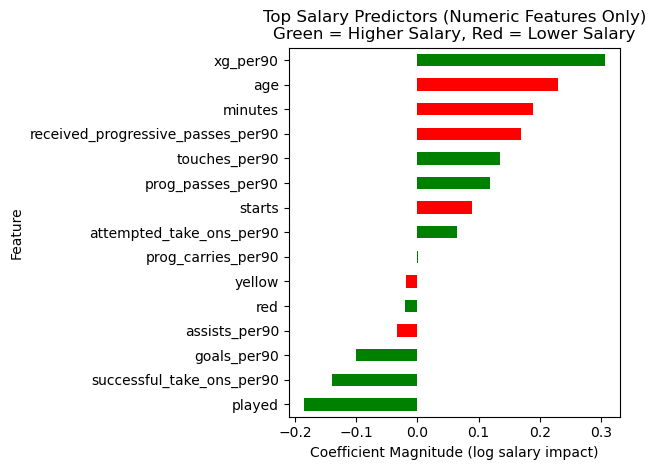

Key Insights:
1. Most positive influence: xg_per90 ($0.31 log salary impact)
2. Most negative influence: prog_carries_per90 ($0.00 log salary impact)

How to read:
- 1 unit increase in feature X adds exp(coefficient) to predicted salary
- Example: 0.10 coefficient ≈ 10.5% salary increase per unit


In [23]:
# Define numeric features only
numeric_features = [
    'goals_per90', 'assists_per90', 'xg_per90', 
    'prog_carries_per90', 'prog_passes_per90',
    'received_progressive_passes_per90', 'touches_per90',
    'attempted_take_ons_per90', 'successful_take_ons_per90',
    'yellow', 'red', 'played', 'starts', 'minutes', 'age'
]

# Get coefficients from the model
coefficients = model.named_steps['regressor'].coef_[:len(numeric_features)]  # Take only numeric coefficients

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': numeric_features,
    'importance': coefficients
}).sort_values('importance', key=abs, ascending=False)

# Plot top features
plt.figure(figsize=(12, 8))
feature_importance.sort_values('importance').plot.barh(
    x='feature', 
    y='importance',
    color=np.where(feature_importance['importance'] > 0, 'green', 'red'),
    legend=False
)
plt.title('Top Salary Predictors (Numeric Features Only)\nGreen = Higher Salary, Red = Lower Salary')
plt.xlabel('Coefficient Magnitude (log salary impact)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Interpretation
print("Key Insights:")
print(f"1. Most positive influence: {feature_importance.iloc[0]['feature']} (${feature_importance.iloc[0]['importance']:.2f} log salary impact)")
print(f"2. Most negative influence: {feature_importance.iloc[-1]['feature']} (${feature_importance.iloc[-1]['importance']:.2f} log salary impact)")
print("\nHow to read:")
print("- 1 unit increase in feature X adds exp(coefficient) to predicted salary")
print("- Example: 0.10 coefficient ≈ 10.5% salary increase per unit")

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# --- DATA CLEANING ---
# Create copy of original dataframe
player_df_clean = player_df.copy()

# 1. Filter minimum minutes
player_df_clean = player_df_clean[player_df_clean['minutes'] >= 1000]

# 2. Convert salary to millions and handle zeros/missing
player_df_clean['annual_million'] = player_df_clean['Annual'] / 1e6
player_df_clean = player_df_clean[player_df_clean['annual_million'].notna()]
player_df_clean = player_df_clean[player_df_clean['annual_million'] > 0]  # Remove unpaid players

# 3. Calculate per90 metrics safely
player_df_clean['90s'] = player_df_clean['minutes'] / 90
per90_cols = ['goals', 'assists', 'expected_goals', 'progressive_carries',
             'progressive_passes', 'received_progressive_passes', 'touches',
             'attempted_take_ons', 'successful_take_ons', 'carries']

for col in per90_cols:
    if col in player_df_clean.columns:
        player_df_clean[f'{col}_per90'] = player_df_clean[col] / player_df_clean['90s']
        player_df_clean[f'{col}_per90'].fillna(0, inplace=True)  # Fill NA with 0

"""
# 4. Handle categorical variables
for cat_col in ['position', 'team', 'nation']:
    player_df_clean[cat_col] = player_df_clean[cat_col].fillna('Unknown')"""

# 5. Fill remaining numeric NAs
numeric_cols = ['yellow', 'red', 'played', 'starts', 'minutes', 'age']
for col in numeric_cols:
    if col in player_df_clean.columns:
        player_df_clean[col].fillna(player_df_clean[col].median(), inplace=True)

# --- FEATURE ENGINEERING ---
# Define final feature sets
numeric_features = [
    # Absolute stats
    'goals', 'assists', 'expected_goals',
    'progressive_carries', 'progressive_passes',
    'received_progressive_passes', 'touches',
    'attempted_take_ons', 'successful_take_ons',
    'yellow', 'red', 'played', 'starts', 'minutes', 'age',
    
    # Per90 stats (we'll calculate these below)
    'goals_per90', 'assists_per90', 'expected_goals_per90',
    'progressive_carries_per90', 'progressive_passes_per90',
    'received_progressive_passes_per90', 'touches_per90',
    'attempted_take_ons_per90', 'successful_take_ons_per90'
]
#categorical_features = ['position', 'team', 'nation']

# --- MODEL PIPELINE ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Prepare target variable (log transform)
y = np.log1p(player_df_clean['annual_million'])

# Verify no NAs remain
#print("Remaining NAs:", player_df_clean[numeric_features + categorical_features].isna().sum().sum())

# --- MODEL TRAINING ---
model.fit(player_df_clean, y)

# --- PREDICTIONS ---
player_df_clean['log_pred_salary'] = model.predict(player_df_clean)
player_df_clean['predicted_salary'] = np.expm1(player_df_clean['log_pred_salary'])
player_df_clean['salary_residual'] = player_df_clean['annual_million'] - player_df_clean['predicted_salary']

# --- RESULTS ---
# Cross-validation
scores = cross_val_score(model, player_df_clean, y, cv=5, scoring='r2')
print(f"\nModel R2 scores: {scores}")
print(f"Average R2: {np.mean(scores):.3f}")

# Top underpaid/overpaid
top_underpaid = player_df_clean.sort_values('salary_residual').head(10)[[
    'player', 'team', 'position', 'age', 'annual_million', 'predicted_salary', 'salary_residual'
]]
top_overpaid = player_df_clean.sort_values('salary_residual', ascending=False).head(10)[[
    'player', 'team', 'position', 'age', 'annual_million', 'predicted_salary', 'salary_residual'
]]

print("\n🔻 Top 10 Underpaid Players:")
print(top_underpaid.to_string())
print("\n🔺 Top 10 Overpaid Players:")
print(top_overpaid.to_string())




Model R2 scores: [ 0.32011026  0.3592793   0.2485863   0.06214831 -0.38552457]
Average R2: 0.121

🔻 Top 10 Underpaid Players:
               player           team position   age  annual_million  predicted_salary  salary_residual
479       Yoane Wissa      Brentford       FW  28.0        1.587628          8.120845        -6.533217
133        Lewis Dunk       Brighton       DF  33.0        5.080409         11.267216        -6.186807
466     Danny Welbeck       Brighton       FW  34.0        3.810307          8.530833        -4.720526
425  Marcus Tavernier    Bournemouth    FW,MF  26.0        2.222679          6.548685        -4.326006
226      Curtis Jones      Liverpool    MF,DF  24.0        0.952577          5.071747        -4.119170
442   Kieran Trippier  Newcastle Utd       DF  34.0        7.620614         11.565660        -3.945046
486      Ashley Young        Everton       DF  39.0        2.540205          6.476024        -3.935819
66    Cameron Burgess   Ipswich Town       DF  29

C:\Users\bield\AppData\Local\Temp\ipykernel_30648\1196552976.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_df_clean[f'{col}_per90'].fillna(0, inplace=True)  # Fill NA with 0
C:\Users\bield\AppData\Local\Temp\ipykernel_30648\1196552976.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

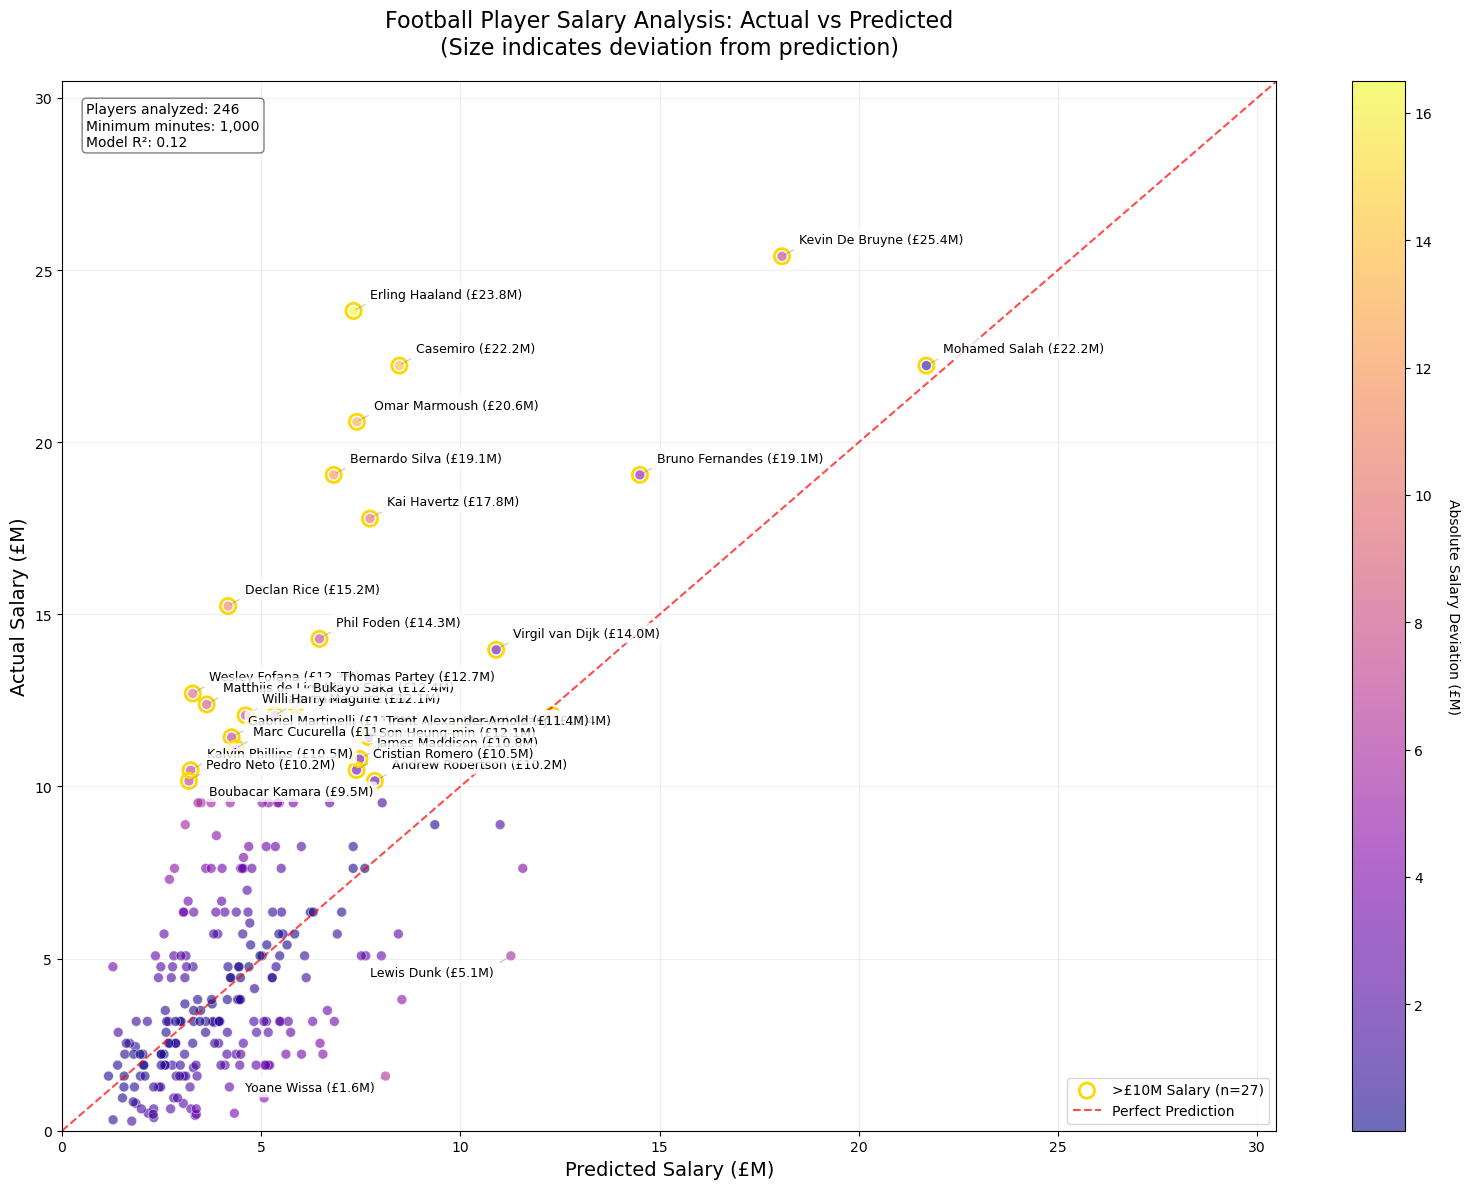

In [25]:
# Calculate distance from trend line
player_df_clean['distance_from_line'] = (
    player_df_clean['annual_million'] - player_df_clean['predicted_salary']
).abs()

# Identify top outliers (furthest from line)
NUM_LABELS = 20  # Adjust this number as needed
outliers = player_df_clean.nlargest(NUM_LABELS, 'distance_from_line')
high_earners = player_df_clean[player_df_clean['annual_million'] > 10]

# Create the plot
plt.figure(figsize=(16, 12))

# Calculate axis limits with padding
max_val = max(
    player_df_clean['predicted_salary'].max(),
    player_df_clean['annual_million'].max()
) * 1.2

# Create base scatter plot with color coding
scatter = plt.scatter(
    player_df_clean['predicted_salary'],
    player_df_clean['annual_million'],
    alpha=0.6,
    c=player_df_clean['distance_from_line'],
    cmap='plasma',
    s=50,
    edgecolors='white',
    linewidth=0.5
)

# Highlight special groups
plt.scatter(
    high_earners['predicted_salary'],
    high_earners['annual_million'],
    s=120,
    edgecolors='gold',
    facecolors='none',
    linewidths=2,
    label=f'>£10M Salary (n={len(high_earners)})'
)

# Perfect prediction line
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.7, label='Perfect Prediction')

# Labeling logic with improved positioning
def smart_annotate(row, ax):
    x, y = row['predicted_salary'], row['annual_million']
    player = row['player']
    
    # Dynamic positioning parameters
    base_offset = 12 if y > 10 or x > 10 else 8
    offset_x = base_offset if y > x else -base_offset
    offset_y = base_offset if y > x else -base_offset
    
    ax.annotate(
        f"{player} (£{y:.1f}M)",
        (x, y),
        xytext=(offset_x, offset_y),
        textcoords='offset points',
        ha='left' if y > x else 'right',
        va='center',
        fontsize=9,
        bbox=dict(
            boxstyle='round,pad=0.3',
            fc='white',
            ec='none',
            alpha=0.8
        ),
        arrowprops=dict(
            arrowstyle='-',
            color='gray',
            alpha=0.4,
            connectionstyle='arc3,rad=0.2'
        )
    )

# Apply labeling to combined set of outliers and high earners
ax = plt.gca()
for _, row in pd.concat([outliers, high_earners]).drop_duplicates().iterrows():
    smart_annotate(row, ax)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Salary Deviation (£M)', rotation=270, labelpad=20)

# Add reference textbox
textstr = '\n'.join((
    f'Players analyzed: {len(player_df_clean)}',
    f'Minimum minutes: 1,000',
    f'Model R²: {np.mean(scores):.2f}'
))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes,
        verticalalignment='top', bbox=props)

# Formatting
plt.xlabel('Predicted Salary (£M)', fontsize=14)
plt.ylabel('Actual Salary (£M)', fontsize=14)
plt.title('Football Player Salary Analysis: Actual vs Predicted\n(Size indicates deviation from prediction)', 
          fontsize=16, pad=20)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.grid(True, alpha=0.2)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

We add all season stats to ttry to improve but the first prbolem keeps us from the result we want. We will try a non linear regressor.

In [26]:
from sklearn.ensemble import RandomForestRegressor


# Example: weight players by salary (so high-paid players influence more)
sample_weights = player_df_clean['annual_million'] / player_df_clean['annual_million'].mean()

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Prepare target variable (log transform)
y = np.log1p(player_df_clean['annual_million'])

# Verify no NAs remain
#print("Remaining NAs:", player_df_clean[numeric_features + categorical_features].isna().sum().sum())

# --- MODEL TRAINING ---
model.fit(player_df_clean, y, regressor__sample_weight=sample_weights)


# --- PREDICTIONS ---
player_df_clean['log_pred_salary'] = model.predict(player_df_clean)
player_df_clean['predicted_salary'] = np.expm1(player_df_clean['log_pred_salary'])
player_df_clean['salary_residual'] = player_df_clean['annual_million'] - player_df_clean['predicted_salary']

# --- RESULTS ---
# Cross-validation
scores = cross_val_score(model, player_df_clean, y, cv=5, scoring='r2')
print(f"\nModel R2 scores: {scores}")
print(f"Average R2: {np.mean(scores):.3f}")

# Top underpaid/overpaid
top_underpaid = player_df_clean.sort_values('salary_residual').head(10)[[
    'player', 'team', 'position', 'age', 'annual_million', 'predicted_salary', 'salary_residual'
]]
top_overpaid = player_df_clean.sort_values('salary_residual', ascending=False).head(10)[[
    'player', 'team', 'position', 'age', 'annual_million', 'predicted_salary', 'salary_residual'
]]

print("\n🔻 Top 10 Underpaid Players:")
print(top_underpaid.to_string())
print("\n🔺 Top 10 Overpaid Players:")
print(top_overpaid.to_string())





Model R2 scores: [0.31843746 0.25160496 0.19574233 0.1754039  0.01211466]
Average R2: 0.191

🔻 Top 10 Underpaid Players:
               player           team position   age  annual_million  predicted_salary  salary_residual
476      Harry Wilson         Fulham    FW,MF  28.0        2.222679          3.818349        -1.595670
479       Yoane Wissa      Brentford       FW  28.0        1.587628          3.173110        -1.585482
394     Marcos Senesi    Bournemouth       DF  28.0        3.175256          4.717973        -1.542717
343       Alex Palmer   Ipswich Town       GK  28.0        0.837690          1.990956        -1.153266
315      Jacob Murphy  Newcastle Utd       FW  30.0        2.222679          3.350390        -1.127711
4       Simon Adingra       Brighton    FW,MF  23.0        0.793814          1.903447        -1.109633
425  Marcus Tavernier    Bournemouth    FW,MF  26.0        2.222679          3.313448        -1.090769
413     Jack Stephens    Southampton       DF  31.0   

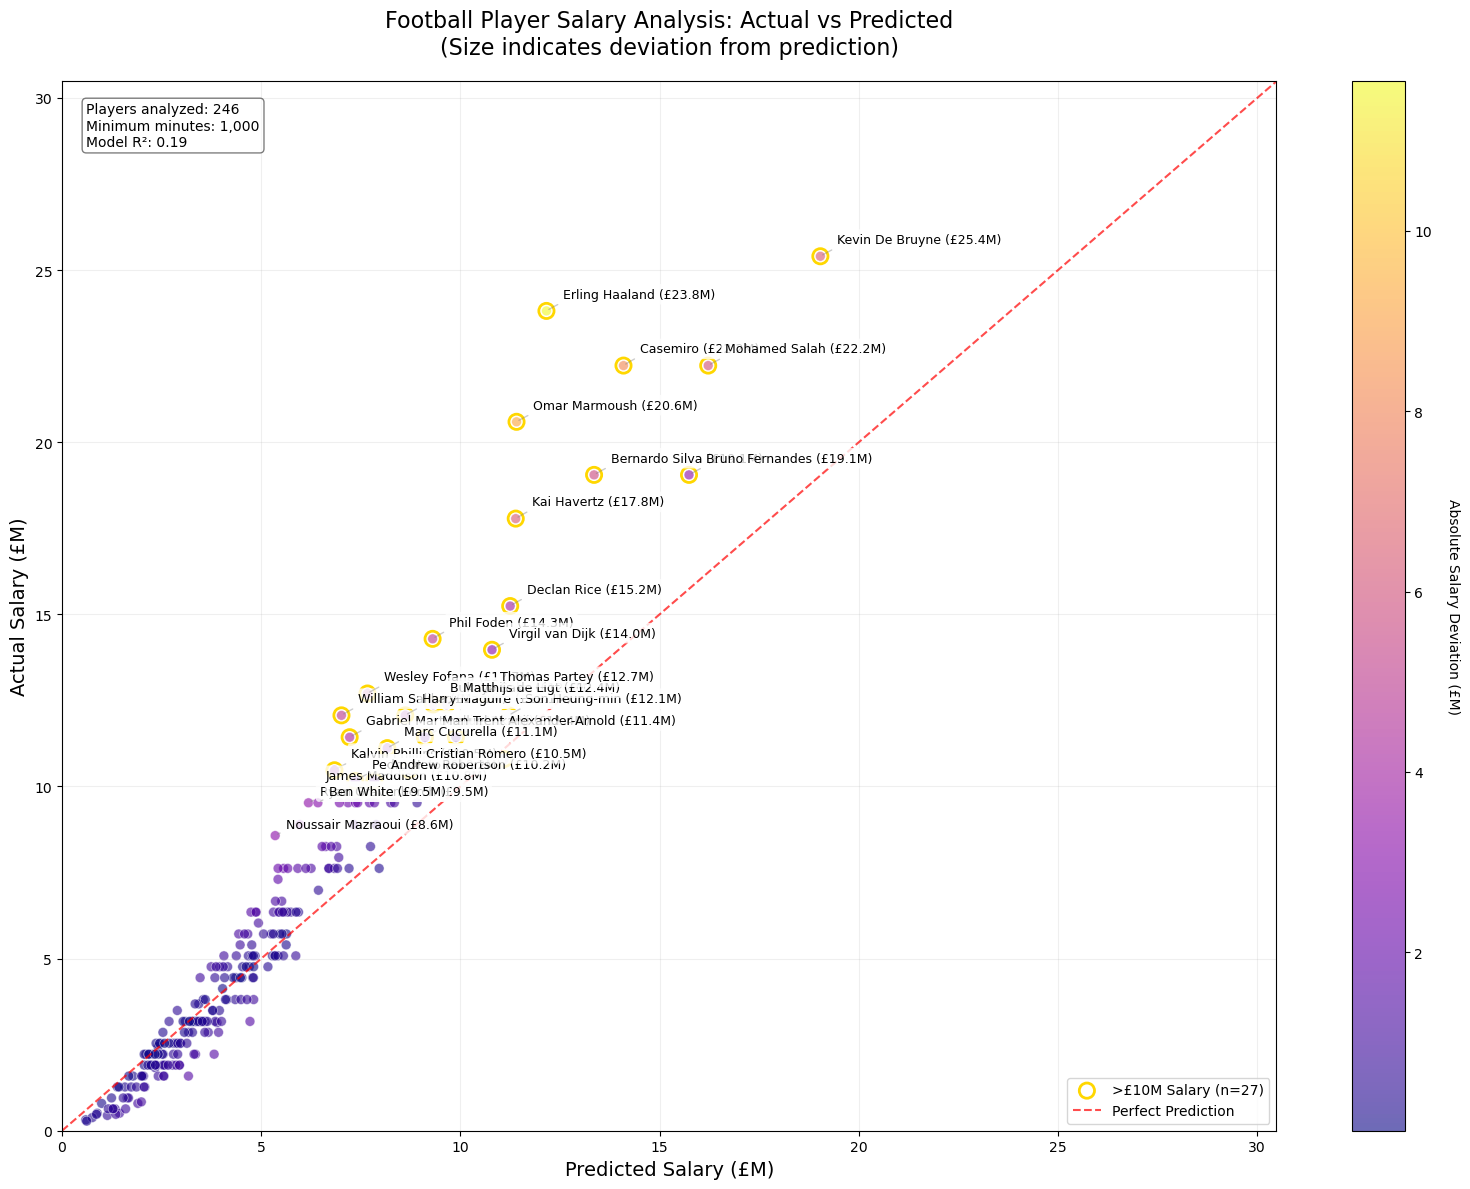

In [27]:
# Calculate distance from trend line
player_df_clean['distance_from_line'] = (
    player_df_clean['annual_million'] - player_df_clean['predicted_salary']
).abs()

# Identify top outliers (furthest from line)
NUM_LABELS = 20  # Adjust this number as needed
outliers = player_df_clean.nlargest(NUM_LABELS, 'distance_from_line')
high_earners = player_df_clean[player_df_clean['annual_million'] > 10]

# Create the plot
plt.figure(figsize=(16, 12))

# Calculate axis limits with padding
max_val = max(
    player_df_clean['predicted_salary'].max(),
    player_df_clean['annual_million'].max()
) * 1.2

# Create base scatter plot with color coding
scatter = plt.scatter(
    player_df_clean['predicted_salary'],
    player_df_clean['annual_million'],
    alpha=0.6,
    c=player_df_clean['distance_from_line'],
    cmap='plasma',
    s=50,
    edgecolors='white',
    linewidth=0.5
)

# Highlight special groups
plt.scatter(
    high_earners['predicted_salary'],
    high_earners['annual_million'],
    s=120,
    edgecolors='gold',
    facecolors='none',
    linewidths=2,
    label=f'>£10M Salary (n={len(high_earners)})'
)

# Perfect prediction line
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.7, label='Perfect Prediction')

# Labeling logic with improved positioning
def smart_annotate(row, ax):
    x, y = row['predicted_salary'], row['annual_million']
    player = row['player']
    
    # Dynamic positioning parameters
    base_offset = 12 if y > 10 or x > 10 else 8
    offset_x = base_offset if y > x else -base_offset
    offset_y = base_offset if y > x else -base_offset
    
    ax.annotate(
        f"{player} (£{y:.1f}M)",
        (x, y),
        xytext=(offset_x, offset_y),
        textcoords='offset points',
        ha='left' if y > x else 'right',
        va='center',
        fontsize=9,
        bbox=dict(
            boxstyle='round,pad=0.3',
            fc='white',
            ec='none',
            alpha=0.8
        ),
        arrowprops=dict(
            arrowstyle='-',
            color='gray',
            alpha=0.4,
            connectionstyle='arc3,rad=0.2'
        )
    )

# Apply labeling to combined set of outliers and high earners
ax = plt.gca()
for _, row in pd.concat([outliers, high_earners]).drop_duplicates().iterrows():
    smart_annotate(row, ax)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Absolute Salary Deviation (£M)', rotation=270, labelpad=20)

# Add reference textbox
textstr = '\n'.join((
    f'Players analyzed: {len(player_df_clean)}',
    f'Minimum minutes: 1,000',
    f'Model R²: {np.mean(scores):.2f}'
))
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes,
        verticalalignment='top', bbox=props)

# Formatting
plt.xlabel('Predicted Salary (£M)', fontsize=14)
plt.ylabel('Actual Salary (£M)', fontsize=14)
plt.title('Football Player Salary Analysis: Actual vs Predicted\n(Size indicates deviation from prediction)', 
          fontsize=16, pad=20)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.grid(True, alpha=0.2)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

We get that all players are closer to the trend line but still the most payed are overpayed. Now we can try other algorithms, normalizations or add categorical data like the team they play for or if they are superestars. Now we do it with categorical features linealy not with random forest,

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# --- DATA CLEANING ---
# Create copy properly to avoid chained assignment
player_df_clean = player_df.copy()

# 1. Filter minimum minutes
player_df_clean = player_df_clean[player_df_clean['minutes'] >= 1000].copy()

# 2. Convert salary to millions and handle zeros/missing
player_df_clean = player_df_clean.assign(
    annual_million = lambda x: x['Annual'] / 1e6
).query('annual_million.notna() & annual_million > 0').copy()

# 3. Calculate per90 metrics safely without inplace
player_df_clean = player_df_clean.assign(
    **{'90s': lambda x: x['minutes'] / 90}
)

per90_cols = ['goals', 'assists', 'expected_goals', 'progressive_carries',
             'progressive_passes', 'received_progressive_passes', 'touches',
             'attempted_take_ons', 'successful_take_ons', 'carries']

# Calculate per90 stats without inplace
for col in per90_cols:
    if col in player_df_clean.columns:
        player_df_clean = player_df_clean.assign(
            **{f'{col}_per90': lambda x: x[col] / x['90s']}
        )
        player_df_clean[f'{col}_per90'] = player_df_clean[f'{col}_per90'].fillna(0)

# 4. Fill numeric NAs without inplace
numeric_cols = ['yellow', 'red', 'played', 'starts', 'minutes', 'age']
for col in numeric_cols:
    if col in player_df_clean.columns:
        player_df_clean[col] = player_df_clean[col].fillna(player_df_clean[col].median())

# 5. Handle categorical NAs without inplace
for cat_col in ['position', 'team']:
    if cat_col in player_df_clean.columns:
        player_df_clean[cat_col] = player_df_clean[cat_col].fillna('Unknown')

# --- FEATURE ENGINEERING ---
numeric_features = [
    'goals', 'assists', 'expected_goals', 'progressive_carries', 'progressive_passes',
    'received_progressive_passes', 'touches', 'attempted_take_ons', 'successful_take_ons',
    'yellow', 'red', 'played', 'starts', 'minutes', 'age',
    'goals_per90', 'assists_per90', 'expected_goals_per90', 'progressive_carries_per90',
    'progressive_passes_per90', 'received_progressive_passes_per90', 'touches_per90',
    'attempted_take_ons_per90', 'successful_take_ons_per90'
]

categorical_features = ['position', 'team']

# --- PIPELINE ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- MODEL TRAINING ---
y = np.log1p(player_df_clean['annual_million'])  # log(salary)
model.fit(player_df_clean, y)

# --- PREDICTIONS ---
player_df_clean = player_df_clean.assign(
    log_pred_salary = model.predict(player_df_clean),
    predicted_salary = lambda x: np.expm1(x['log_pred_salary']),
    salary_residual = lambda x: x['annual_million'] - x['predicted_salary'],
    salary_pct_diff = lambda x: ((x['annual_million'] - x['predicted_salary']) / x['predicted_salary']) * 100
)

# --- EVALUATION ---
scores = cross_val_score(model, player_df_clean, y, cv=5, scoring='r2')
print(f"\nModel R2 scores: {scores}")
print(f"Average R2: {np.mean(scores):.3f}")

# --- RESULTS ---
# Filter and sort by percentage difference
def get_top_players(df, condition, ascending=True, n=30):
    return (df.query(condition)
            .sort_values('salary_pct_diff', ascending=ascending)
            .head(n)[[
                'player', 'team', 'position', 'age', 
                'annual_million', 'predicted_salary', 'salary_pct_diff'
            ]]
            .round(1))

top_underpaid = get_top_players(player_df_clean, 'salary_pct_diff < 0')
top_overpaid = get_top_players(player_df_clean, 'salary_pct_diff > 0', ascending=False)

print("\n🔻 Top 30 Most Underpaid Players (% below expected):")
print(top_underpaid.to_string())
print("\n🔺 Top 30 Most Overpaid Players (% above expected):")
print(top_overpaid.to_string())


Model R2 scores: [0.50098171 0.56305806 0.21247176 0.435307   0.27080647]
Average R2: 0.397

🔻 Top 30 Most Underpaid Players (% below expected):
                    player             team position   age  annual_million  predicted_salary  salary_pct_diff
258     Myles Lewis-Skelly          Arsenal       DF  18.0             0.3               2.3            -88.1
186             Lewis Hall    Newcastle Utd       DF  20.0             0.4               2.5            -82.0
226           Curtis Jones        Liverpool    MF,DF  24.0             1.0               4.5            -78.9
66         Cameron Burgess     Ipswich Town       DF  29.0             0.5               2.4            -78.6
190  Taylor Harwood-Bellis      Southampton       DF  23.0             0.5               2.1            -77.0
120          Tyler Dibling      Southampton    FW,MF  19.0             0.3               1.2            -73.1
271          Kobbie Mainoo   Manchester Utd       MF  20.0             1.3          

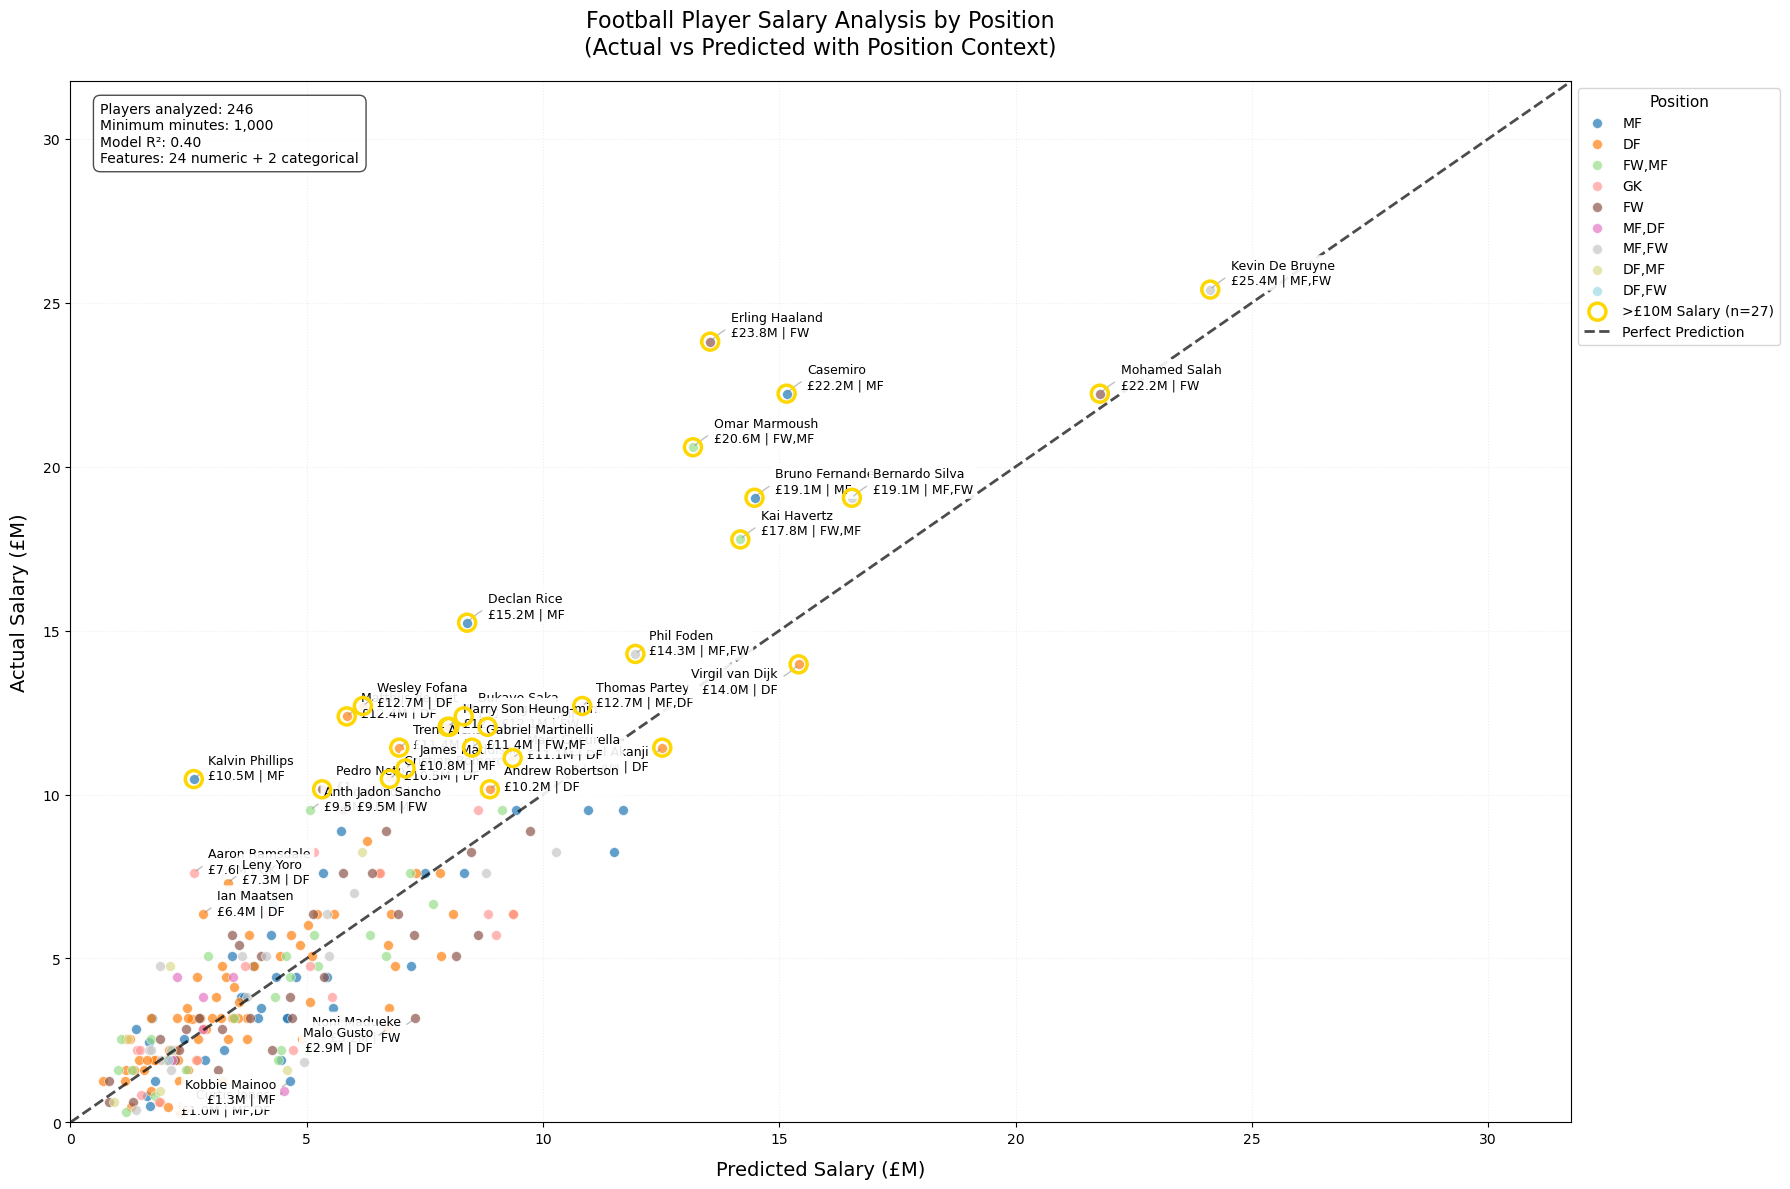

In [33]:
# Calculate distance from trend line and identify key groups
player_df_clean['distance_from_line'] = (
    player_df_clean['annual_million'] - player_df_clean['predicted_salary']
).abs()

NUM_LABELS = 25  # Number of outliers to label
outliers = player_df_clean.nlargest(NUM_LABELS, 'distance_from_line')
high_earners = player_df_clean[player_df_clean['annual_million'] > 10]

# Create the plot
plt.figure(figsize=(18, 12))

# Calculate axis limits with padding
max_val = max(
    player_df_clean['predicted_salary'].max(),
    player_df_clean['annual_million'].max()
) * 1.25

# Enhanced scatter plot with position-based coloring
positions = player_df_clean['position'].unique()
position_colors = plt.cm.tab20(np.linspace(0, 1, len(positions)))

for position, color in zip(positions, position_colors):
    subset = player_df_clean[player_df_clean['position'] == position]
    plt.scatter(
        subset['predicted_salary'],
        subset['annual_million'],
        alpha=0.7,
        color=color,
        s=50,
        edgecolors='white',
        linewidth=0.5,
        label=position
    )

# Highlight special groups
plt.scatter(
    high_earners['predicted_salary'],
    high_earners['annual_million'],
    s=150,
    edgecolors='gold',
    facecolors='none',
    linewidths=2.5,
    label=f'>£10M Salary (n={len(high_earners)})',
    zorder=10
)

# Perfect prediction line
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.7, label='Perfect Prediction', linewidth=2)

# Smart labeling function with position awareness
def smart_annotate(row, ax):
    x, y = row['predicted_salary'], row['annual_million']
    position = row['position']
    
    # Dynamic positioning
    base_offset = 15 if y > 15 or x > 15 else 10
    offset_x = base_offset if y > x else -base_offset
    offset_y = base_offset * 0.8 if y > x else -base_offset * 0.8
    
    # Position-based text formatting
    text = f"{row['player']}\n£{y:.1f}M | {position}"
    
    ax.annotate(
        text,
        (x, y),
        xytext=(offset_x, offset_y),
        textcoords='offset points',
        ha='left' if y > x else 'right',
        va='center',
        fontsize=9,
        bbox=dict(
            boxstyle='round,pad=0.3',
            fc='white',
            ec='none',
            alpha=0.9
        ),
        arrowprops=dict(
            arrowstyle='-',
            color='gray',
            alpha=0.5,
            linewidth=1,
            connectionstyle='arc3,rad=0.3'
        )
    )

# Apply labeling
ax = plt.gca()
for _, row in pd.concat([outliers, high_earners]).drop_duplicates().iterrows():
    smart_annotate(row, ax)

# Add reference information
textstr = '\n'.join((
    f'Players analyzed: {len(player_df_clean)}',
    f'Minimum minutes: 1,000',
    f'Model R²: {np.mean(scores):.2f}',
    f'Features: {len(numeric_features)} numeric + {len(categorical_features)} categorical'
))
props = dict(boxstyle='round', facecolor='white', alpha=0.7, pad=0.5)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes,
        verticalalignment='top', fontsize=10, bbox=props)

# Formatting
plt.xlabel('Predicted Salary (£M)', fontsize=14, labelpad=10)
plt.ylabel('Actual Salary (£M)', fontsize=14, labelpad=10)
plt.title('Football Player Salary Analysis by Position\n(Actual vs Predicted with Position Context)', 
          fontsize=16, pad=20)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.grid(True, alpha=0.2, linestyle=':')

# Improved legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
plt.legend(unique_labels.values(), unique_labels.keys(), 
           loc='upper left', bbox_to_anchor=(1, 1),
           fontsize=10, title='Position', title_fontsize=11)

plt.tight_layout()
plt.show()

We save the expected salary for each player in the player_salaries.csv

In [37]:
# Calculate expected salaries (in millions)
player_df_clean['expected_salary_million'] = player_df_clean['predicted_salary']

# Convert back to original annual salary scale
player_df_clean['expected_salary'] = player_df_clean['expected_salary_million'] * 1e6

# Debugging print statements
print("Columns in player_salaries:", df_dict['player_salaries'].columns.tolist())
print("Columns in player_df_clean:", player_df_clean.columns.tolist())

# Check if 'player' exists in both DataFrames
print("\n'player' in player_salaries?", 'player' in df_dict['player_salaries'].columns)
print("'player' in player_df_clean?", 'player' in player_df_clean.columns)

# Check for alternative name columns
print("\nPossible key columns in player_salaries:", 
      [col for col in df_dict['player_salaries'].columns if 'name' in col.lower() or 'player' in col.lower()])
print("Possible key columns in player_df_clean:", 
      [col for col in player_df_clean.columns if 'name' in col.lower() or 'player' in col.lower()])

# Merge with original salaries - fixing the column name mismatch
player_salaries_with_pred = pd.merge(
    df_dict['player_salaries'].rename(columns={'Player': 'player'}),  # Fix the capitalization here
    player_df_clean[['player', 'expected_salary', 'salary_pct_diff']],
    on='player',
    how='left'
)


# Save back to CSV
player_salaries_with_pred.to_csv('player_salaries_with_expected.csv', index=False)

print(f"Added expected salary to {len(player_salaries_with_pred)} players")
print("Saved to player_salaries_with_expected.csv")

Columns in player_salaries: ['Player', 'Nation', 'Position', 'Team', 'Age', 'Weekly', 'Annual']
Columns in player_df_clean: ['player', 'nation', 'position', 'team', 'age', 'born', 'played', 'starts', 'minutes', 'goals', 'assists', 'penalty_kicks', 'penalty_kick_attempts', 'yellow', 'red', 'expected_goals', 'progressive_carries', 'progressive_passes', 'received_progressive_passes', 'nation_pos', 'position_pos', '90s', 'touches', 'deffensive_touches', 'middle_touches', 'attacking_touches', 'attempted_take_ons', 'successful_take_ons', 'takeons_tackled', 'carries', 'total_distance_carried', 'received', 'Annual', 'annual_million', 'goals_per90', 'assists_per90', 'xg_per90', 'prog_carries_per90', 'prog_passes_per90', 'goals_per_million', 'assists_per_million', 'xg_per_million', 'prog_carries_per_million', 'prog_passes_per_million', 'predicted_salary', 'salary_residual', 'log_pred_salary', 'expected_goals_per90', 'progressive_carries_per90', 'progressive_passes_per90', 'received_progressive_p